### This code plots the heatmap for Immunity and cell stress in samples exposed to cosmic radiations in-flights, post-flight and a combination of both. Each group was splitted based on radio-sensitivity of the tissues:
    * Highly Radiosensitive Tissues (Eyes, Skin, Thymus, Spleen)
    * Intermediate Radiosensitivity Tissues (Liver, Kidney, Heart, Lung, Adrenal Glands)
    * Low Radiosensitive Tissues (Muscle and Brain)

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
df = pd.read_excel('All_strain.xlsx')
df

,Organ,Radio_Sensitivity,mGy_Absorbed,ISS_Days,Return_Days,Sex,Strain,Age,Mission,MT_Central_Dogma,...,mtDNA_Activated,mtdsRNA_Activated,ISR,UPR,Induced_Senescence,Inhibited_Senescence,Necroptosis,Apoptosis,Pyroptosis,Extracellular_Matrix
0,Spleen,1,8.9700,39.00,1,M,C57BL/6,8.0,MHU-1,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.875506
1,Thymus,1,3.1500,13.00,1,F,C57BL/6,8.0,STS-118,-2.000000,...,-1.346757,-1.458871,-1.663817,-2.093026,-1.927908,-1.923250,-1.265627,-1.365548,-1.511577,-1.554172
2,Thymus,1,8.9700,39.00,1,M,C57BL/6,8.0,MHU-1,-1.000000,...,0.000000,1.818500,0.000000,0.000000,0.000000,-1.784773,0.000000,0.000000,0.000000,2.251925
3,Muscle,4,5.0875,22.50,0,M,C57BL/6,9.0,RR-4,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Liver,3,4.6600,12.76,1,F,C57BL/6,9.0,STS-135,0.000000,...,0.000000,-1.542452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.236438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,Skin,2,21.9530,75.00,0,F,C57BL/6,11.0,RR-7,-1.951596,...,0.000000,1.723189,0.000000,0.000000,0.000000,-1.962828,0.000000,0.000000,0.000000,1.706154
532,Muscle,4,30.0700,29.85,1,M,C57BL/6,19.5,BION-M1,-3.000000,...,1.797901,0.000000,0.000000,-1.714215,0.000000,0.000000,1.444190,0.000000,0.000000,0.000000
533,Muscle,4,30.0700,29.85,1,M,C57BL/6,19.5,BION-M1,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.323836,0.000000,0.000000,0.000000,-1.423649
534,Muscle,4,30.0700,29.85,1,M,C57BL/6,19.5,BION-M1,-2.000000,...,0.000000,0.000000,0.000000,-1.577384,1.325273,1.540694,0.000000,0.000000,0.000000,-1.475530


### Inflight vs Post-flight

In [10]:
# In-flight
di = df[df['Return_Days'] < 1]
di

,Organ,Radio_Sensitivity,mGy_Absorbed,ISS_Days,Return_Days,Sex,Strain,Age,Mission,MT_Central_Dogma,...,mtDNA_Activated,mtdsRNA_Activated,ISR,UPR,Induced_Senescence,Inhibited_Senescence,Necroptosis,Apoptosis,Pyroptosis,Extracellular_Matrix
3,Muscle,4,5.0875,22.5,0,M,C57BL/6,9.0,RR-4,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
14,Liver,3,6.4700,22.5,0,F,BALB/c,11.0,RRRM-1/RR-8,0.000000,...,0.0,0.000000,0.0,0.0,1.285257,1.276874,0.0,0.0,0.00000,0.000000
15,Kidney,3,6.4625,25.0,0,F,C3H/HeJ,11.0,RR-7,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
16,Kidney,3,6.4625,25.0,0,F,C57BL/6,11.0,RR-7,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
17,Kidney,3,19.3875,75.0,0,F,C3H/HeJ,11.0,RR-7,-2.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,2.270018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Heart,3,17.8450,55.0,0,F,C57BL/6,29.0,RRRM-2/RR-17,-2.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
528,Kidney,3,19.3875,75.0,0,F,C3H/HeJ,11.0,RR-7,-2.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,2.270018
529,Kidney,3,19.3875,75.0,0,F,C57BL/6,11.0,RR-7,-3.000000,...,0.0,1.535754,0.0,0.0,1.366998,0.000000,0.0,0.0,1.44469,2.150134
530,Skin,2,21.9528,75.0,0,F,C3H/HeJ,11.0,RR-7,-1.869951,...,0.0,0.000000,0.0,0.0,0.000000,-1.664703,0.0,0.0,0.00000,1.573872


In [11]:
# Post-flight
dp = df[df['Return_Days'] > 0]
dp

,Organ,Radio_Sensitivity,mGy_Absorbed,ISS_Days,Return_Days,Sex,Strain,Age,Mission,MT_Central_Dogma,...,mtDNA_Activated,mtdsRNA_Activated,ISR,UPR,Induced_Senescence,Inhibited_Senescence,Necroptosis,Apoptosis,Pyroptosis,Extracellular_Matrix
0,Spleen,1,8.970,39.00,1,M,C57BL/6,8.0,MHU-1,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.875506
1,Thymus,1,3.150,13.00,1,F,C57BL/6,8.0,STS-118,-2.0,...,-1.346757,-1.458871,-1.663817,-2.093026,-1.927908,-1.923250,-1.265627,-1.365548,-1.511577,-1.554172
2,Thymus,1,8.970,39.00,1,M,C57BL/6,8.0,MHU-1,-1.0,...,0.000000,1.818500,0.000000,0.000000,0.000000,-1.784773,0.000000,0.000000,0.000000,2.251925
4,Liver,3,4.660,12.76,1,F,C57BL/6,9.0,STS-135,0.0,...,0.000000,-1.542452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.236438
5,Liver,3,4.660,12.76,1,F,C57BL/6,9.0,STS-135,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.275027,0.000000,0.000000,0.000000,-1.178671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,Muscle,4,13.135,37.00,1,M,C57BL/6,16.5,RR-23,0.0,...,0.000000,0.000000,0.000000,-1.563117,-1.328988,0.000000,0.000000,0.000000,0.000000,0.000000
532,Muscle,4,30.070,29.85,1,M,C57BL/6,19.5,BION-M1,-3.0,...,1.797901,0.000000,0.000000,-1.714215,0.000000,0.000000,1.444190,0.000000,0.000000,0.000000
533,Muscle,4,30.070,29.85,1,M,C57BL/6,19.5,BION-M1,-2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.323836,0.000000,0.000000,0.000000,-1.423649
534,Muscle,4,30.070,29.85,1,M,C57BL/6,19.5,BION-M1,-2.0,...,0.000000,0.000000,0.000000,-1.577384,1.325273,1.540694,0.000000,0.000000,0.000000,-1.475530


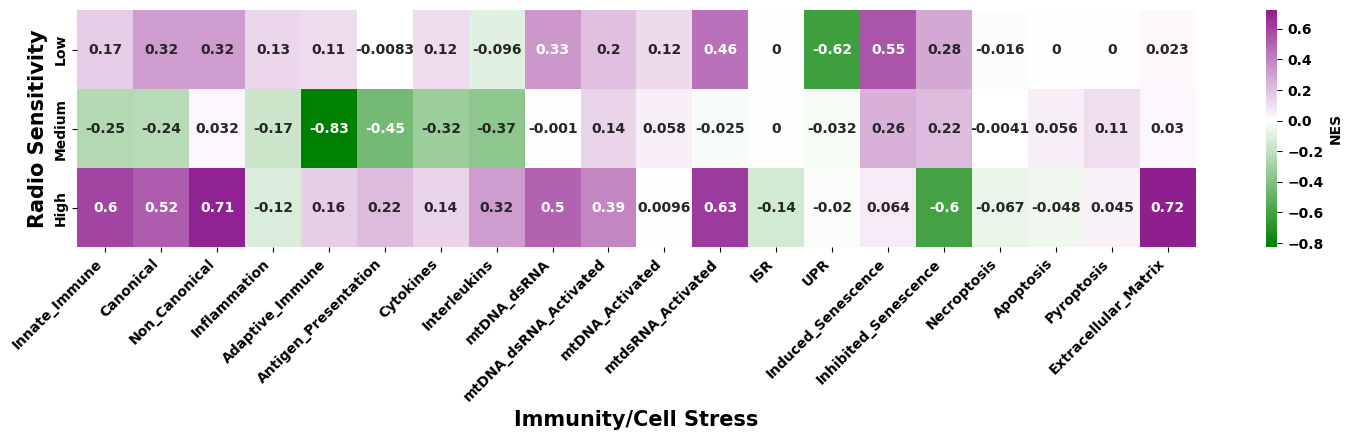

In [25]:
# Define the Mitochondrial processes for all samples

target_processes = [
    'Innate_Immune', 'Canonical', 'Non_Canonical', 'Inflammation',
    'Adaptive_Immune', 'Antigen_Presentation', 'Cytokines', 'Interleukins',
    'mtDNA_dsRNA', 'mtDNA_dsRNA_Activated', 'mtDNA_Activated', 'mtdsRNA_Activated',
    'ISR', 'UPR', 'Induced_Senescence', 'Inhibited_Senescence',
    'Necroptosis', 'Apoptosis', 'Pyroptosis', 'Extracellular_Matrix'
]

# Check which columns from the list exist in the DataFrame
existing_processes = [process for process in target_processes if process in df.columns]

# Function to categorize radio sensitivity
def categorize_sensitivity(val):
    if val in [1, 2]:  # Very High and High
        return 'High'
    elif val == 3:     # medium
        return 'Medium'
    elif val in [4, 5]:  # Low and Very Low
        return 'Low'
    return 'Unknown'

# Apply the categorization
df['Radio_Sensitivity_Group'] = df['Radio_Sensitivity'].apply(categorize_sensitivity)

# Group by the new Radio_Sensitivity_Group and compute mean NES values for target processes
grouped_nes = df.groupby('Radio_Sensitivity_Group')[existing_processes].mean()

# Reorder the groups
grouped_nes = grouped_nes.reindex(['Low', 'Medium', 'High'])

# Define a custom colormap transitioning from green to white to purple
colors = ["green", "white", "purple"]
cmap = LinearSegmentedColormap.from_list("GreenWhitePurple", colors, N=256)

# Create the heatmap
plt.figure(figsize=(15, 4.5))
sns.heatmap(
    grouped_nes,
    annot=True,
    cmap=cmap,
    center=0,
    cbar_kws={'label': 'NES'}
)
plt.ylabel("Radio Sensitivity", fontsize=15)
plt.xlabel("Immunity/Cell Stress", fontsize=15)
plt.xticks(rotation=45, ha='right')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.tight_layout()
plt.savefig('Immunity_vs_Sensitivity_All_samples.svg',format='svg', dpi=600, transparent=False)
plt.show()

/var/folders/46/cj6n_4l149bdb43wbr6p3lhm0000gn/T/ipykernel_10113/3748608170.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  di['Radio_Sensitivity_Group'] = di['Radio_Sensitivity'].apply(categorize_sensitivity)


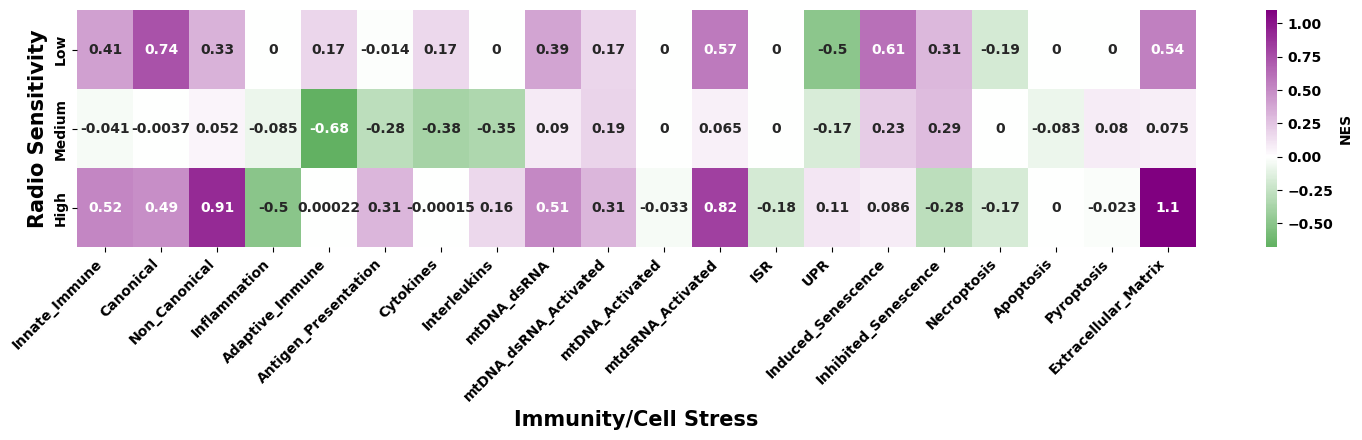

In [26]:
# Define the Mitochondrial processes for all samples

target_processes = [
    'Innate_Immune', 'Canonical', 'Non_Canonical', 'Inflammation',
    'Adaptive_Immune', 'Antigen_Presentation', 'Cytokines', 'Interleukins',
    'mtDNA_dsRNA', 'mtDNA_dsRNA_Activated', 'mtDNA_Activated', 'mtdsRNA_Activated',
    'ISR', 'UPR', 'Induced_Senescence', 'Inhibited_Senescence',
    'Necroptosis', 'Apoptosis', 'Pyroptosis', 'Extracellular_Matrix'
]

# Check which columns from the list exist in the DataFrame
existing_processes = [process for process in target_processes if process in di.columns]

# Function to categorize radio sensitivity
def categorize_sensitivity(val):
    if val in [1, 2]:  # Very High and High
        return 'High'
    elif val == 3:     # medium
        return 'Medium'
    elif val in [4, 5]:  # Low and Very Low
        return 'Low'
    return 'Unknown'

# Apply the categorization
di['Radio_Sensitivity_Group'] = di['Radio_Sensitivity'].apply(categorize_sensitivity)

# Group by the new Radio_Sensitivity_Group and compute mean NES values for target processes
grouped_nes = di.groupby('Radio_Sensitivity_Group')[existing_processes].mean()

# Reorder the groups
grouped_nes = grouped_nes.reindex(['Low', 'Medium', 'High'])

# Define a custom colormap transitioning from green to white to purple
colors = ["green", "white", "purple"]
cmap = LinearSegmentedColormap.from_list("GreenWhitePurple", colors, N=256)

# Create the heatmap
plt.figure(figsize=(15, 4.5))
sns.heatmap(
    grouped_nes,
    annot=True,
    cmap=cmap,
    center=0,
    cbar_kws={'label': 'NES'}
)
plt.ylabel("Radio Sensitivity", fontsize=15)
plt.xlabel("Immunity/Cell Stress", fontsize=15)
plt.xticks(rotation=45, ha='right')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.tight_layout()
plt.savefig('Immunity_vs_Sensitivity_Inflight.svg',format='svg', dpi=600, transparent=False)
plt.show()

/var/folders/46/cj6n_4l149bdb43wbr6p3lhm0000gn/T/ipykernel_10113/2388671530.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['Radio_Sensitivity_Group'] = dp['Radio_Sensitivity'].apply(categorize_sensitivity)


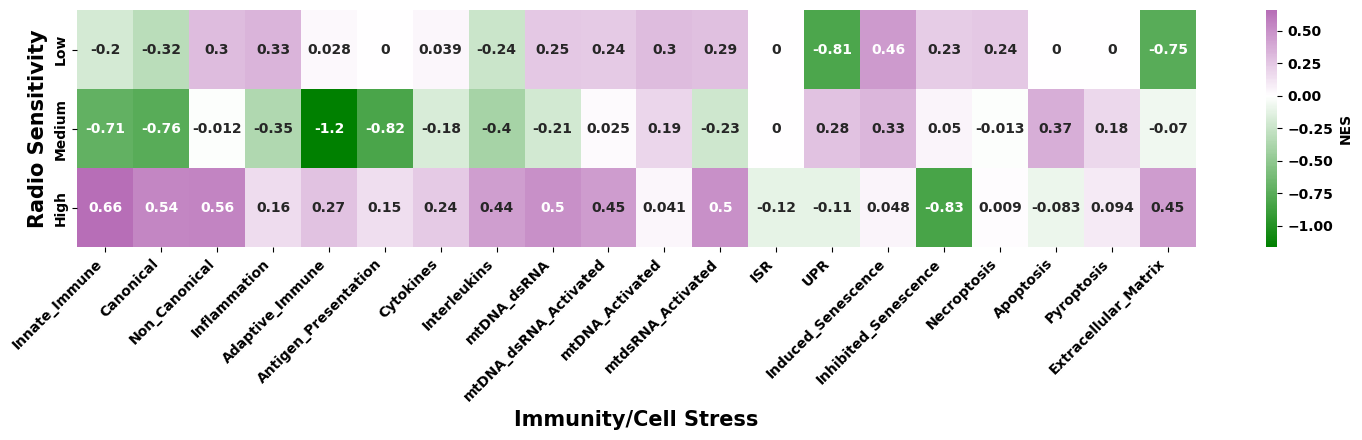

In [27]:
# Define the Mitochondrial processes for all samples

target_processes = [
    'Innate_Immune', 'Canonical', 'Non_Canonical', 'Inflammation',
    'Adaptive_Immune', 'Antigen_Presentation', 'Cytokines', 'Interleukins',
    'mtDNA_dsRNA', 'mtDNA_dsRNA_Activated', 'mtDNA_Activated', 'mtdsRNA_Activated',
    'ISR', 'UPR', 'Induced_Senescence', 'Inhibited_Senescence',
    'Necroptosis', 'Apoptosis', 'Pyroptosis', 'Extracellular_Matrix'
]

# Check which columns from the list exist in the DataFrame
existing_processes = [process for process in target_processes if process in dp.columns]

# Function to categorize radio sensitivity
def categorize_sensitivity(val):
    if val in [1, 2]:  # Very High and High
        return 'High'
    elif val == 3:     # medium
        return 'Medium'
    elif val in [4, 5]:  # Low and Very Low
        return 'Low'
    return 'Unknown'

# Apply the categorization
dp['Radio_Sensitivity_Group'] = dp['Radio_Sensitivity'].apply(categorize_sensitivity)

# Group by the new Radio_Sensitivity_Group and compute mean NES values for target processes
grouped_nes = dp.groupby('Radio_Sensitivity_Group')[existing_processes].mean()

# Reorder the groups
grouped_nes = grouped_nes.reindex(['Low', 'Medium', 'High'])

# Define a custom colormap transitioning from green to white to purple
colors = ["green", "white", "purple"]
cmap = LinearSegmentedColormap.from_list("GreenWhitePurple", colors, N=256)

# Create the heatmap
plt.figure(figsize=(15, 4.5))
sns.heatmap(
    grouped_nes,
    annot=True,
    cmap=cmap,
    center=0,
    cbar_kws={'label': 'NES'}
)
plt.ylabel("Radio Sensitivity", fontsize=15)
plt.xlabel("Immunity/Cell Stress", fontsize=15)
plt.xticks(rotation=45, ha='right')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.tight_layout()
plt.savefig('Immunity_vs_Sensitivity_Postflight.svg',format='svg', dpi=600, transparent=False)
plt.show()